## use Case:
    1. Use It in Jupyter:
                
        from path_manager import addpath
        paths = addpath()
        # Use the returned dictionary if needed
        print("Base dir:", paths['BASE_DIR'])

    2. Use in Python Script:
        from path_manager import addpath
        addpath()
        # Then import modules

### below code , To save the plot and see the data distribution values. x_data = x-axis is created from the data values by uniformly distributting the data from min(data) to max(data)
### we can have quick look of data arrangement , but there is drawback in plot that y-values if they are same should be look piled up on each other will look apart by a certain x-axis difference. so we will plot it differently : 

In [ ]:
from pathlib import Path
import os
import time
# print(f"garbage path : {os.getcwd()} and \n {Path.home()}")

# cws = Path(__file__).resolve().parent   # use it everywhere for current working scripts path (cws)
cws = Path.cwd()
BASE_DIR = cws.parent        # \Projects\substructure_3d_data\Substructure_Different_DataTypes\
DATA_PATH = BASE_DIR/"data"  #  Projects\substructure_3d_data\Substructure_Different_DataTypes\data\
rawnypyData_Path = DATA_PATH/"raw_npyData"
data_dir = str(rawnypyData_Path)
print(f"data_dir : {data_dir}")


import numpy as np
import matplotlib.pyplot as plt

save_dir = BASE_DIR/"results"/"rawData_XYPlot"
os.makedirs(save_dir, exist_ok=True)  # Create if missing

plot_Type = int(input("enter value 0/1: for simple:0 Complex :1"))
t_start = time.time()

if plot_Type == 0:
   
    for file in os.listdir(data_dir):

        if file.endswith('.npy'):
            filename = os.path.join(data_dir,file)
            print(f"filename:{file}")
            data = np.load(filename)
            data = data.flatten().reshape(-1,1)

            x_data = np.linspace(data.min(),data.max(),len(data)) # created the x_axis with it's min and max values and uniformly distributed between them.

            # plot the data 
            # print(f"data size: {data.shape}")
            plt.plot(x_data,data,'.', color = 'blue', markersize=0.4)
            plt.title(f"{file[:-4]} Linearly Spaced Vector ")
            plt.xlabel('linearly spaced vector from data itself')
            plt.ylabel('original Values')
            plt.grid(True)
            # plt.show()

            save_dir = BASE_DIR/"results"/"rawData_XYPlot"
            save_path = os.path.join(save_dir, f"{file[:-4]}")
            if not save_path:
                plt.savefig(save_path, dpi=300)
        plt.close()

if plot_Type == 1:
    for file in os.listdir(data_dir):
        if file.endswith('.npy'):
            filename = os.path.join(data_dir, file)
            print(f"filename: {file}")

            data = np.load(filename).flatten()

            x_data = np.linspace(data.min(), data.max(), len(data))

            # === 1. Find horizontal "flat line" band ===
            # Detect most frequent value range using histogram
            hist_vals, bin_edges = np.histogram(data, bins=10000)
            dominant_bin_index = np.argmax(hist_vals)
            bin_start = bin_edges[dominant_bin_index]
            bin_end = bin_edges[dominant_bin_index + 1]

            flat_band = data[(data >= bin_start) & (data < bin_end)]

            if flat_band.size == 0:
                print("No flat band detected.")
                continue

            flat_min = np.min(flat_band)
            flat_max = np.max(flat_band)
            flat_mean = np.mean(flat_band)

            # === 2. Plot with color-coded data ===
            plt.figure(figsize=(10, 6))
            scatter = plt.scatter(x_data, data, c=data, cmap='viridis', s=0.5)

            # === 3. Draw horizontal lines for flat values ===
            flat_y_vals = [("Min", flat_min, 'red'), 
                        ("Mean", flat_mean, 'orange'), 
                        ("Max", flat_max, 'green')]
            used_y = []

            for label, y_val, color in flat_y_vals:
                plt.axhline(y=y_val, color=color, linestyle='--', linewidth=1)

                # === 4. Auto offset to avoid text overlap ===
                offset = 0
                while any(abs((y_val + offset) - y) < 0.002 * (flat_max - flat_min) for y in used_y):
                    offset += 0.002 * (flat_max - flat_min)
                y_text = y_val + offset
                used_y.append(y_text)

                # Text with position
                plt.text(x_data[0], y_text, f'{label}: {y_val:.8f}', 
                        color=color, fontsize=8, verticalalignment='bottom')

            # === 5. Plot settings ===
            plt.title(f"{file[:-4]} Linearly Spaced Vector")
            plt.xlabel('Linearly spaced vector from data')
            plt.ylabel('Original Values')
            plt.grid(True)
            cbar = plt.colorbar(scatter)

            cbar.set_label('Intensity')

            # Save the figure
            plt.tight_layout()
            save_path = os.path.join(save_dir, f"{file[:-4]}_marked.png")
            if not save_path:
                plt.savefig(save_path, dpi=300)
            plt.close()
            
t_end = time.time()
print(f"Total Time --------------->: {t_end - t_start}")


In [ ]:
# finding resolution of data, so not to skip small varaition, 
# First just plot Raw Data after making flat, if it is equal and more than 2 dimensions -> data = data.flatten()
# x_data = np.linspace(min(data),max(data),len(data)), data = data.flatten() ---> y_data  =  sorted_data = np.sort(data)

# binsize = diff(choosen smallest values after sorting the data) : data = data.flatten().reshape(-1,1)
# 201*201*201 = 8120601; 200*200*200 = 8000000;
# :.2e	1.23e-05	2 decimal places
# :.8e	1.23456000e-11	8 decimal places
# # Print with scientific notation and 8 decimal places
# print(f"{value:.8e}

import numpy as np
import matplotlib.pyplot as plt
import os

from path_manager import addpath
paths = addpath()
from listspecificfiles import readlistFiles
data_path = r"data\raw_npyData"  # relative path with r""relativepath"
files = readlistFiles(data_path,'.npy')
fpath = files.file_with_Path()  # file with path name.
from pathlib import Path
BASE_DIR = Path.cwd().parent
print(f"BASE_DIR:--------> {BASE_DIR}")
save_pathtTEXT  = BASE_DIR/"results"  

################################ for simple plot of data ##############################################
def simple_plot(data,file,savepathplot):
    x_data = np.linspace(min(data),max(data),len(data))
    # fig = plt.figure(figsize=(10,6))
    plt.figure(figsize=(10, 6))
    plt.scatter(x_data,data,s=0.1)
    plt.title(f"{os.path.basename(file)[:-4]} sortred Data ")
    plt.xlabel('Data: linearly spaced data itself')
    plt.ylabel('Data:RI_value')
    plt.grid(True)
    save_dir = BASE_DIR/"results"/"rawData_XYPlot"/"plotSortedData"
    os.makedirs(save_dir,exist_ok=True)
    save_path = os.path.join(save_dir, f"{os.path.basename(file)[:-4]}")
    plt.savefig(save_path, dpi=300)
#####################################################################################################

textFilesSave = os.path.join(save_pathtTEXT,'details_Datafile.txt')   
with open(textFilesSave,'w') as f:
    f.close()
# count = 0
for file in fpath:
    # count +=1
    fileName = os.path.basename(file)
    # print(f"FullfilePath:{file} \n fileName:{fileName}")
    data = np.load(file) 
    Data_shape = data.shape
    data = data.flatten()
    sorted_data = np.sort(data)
    # simple_plot(sorted_data,file,BASE_DIR)

    diff_1data = np.diff(sorted_data)
    # diff_2data = np.diff(sorted_data)

### ------------------------  found zeros in the diff1, Now filter zeros then go for first and second nonzero values --------------
    # Filter out exact or near-zero differences to avoid duplicates
    prcsn = 1e-9 # set precison  
    nonzero_diffs = diff_1data[np.abs(diff_1data) > prcsn]

    # Use np.unique to get distinct difference values
    unique_diffs = np.unique(nonzero_diffs)

    # Extract min and second min, keeping 9 decimal precision
    # for unique_val in range(unique_diffs):
    min_val = unique_diffs[0]
    second_min_val = unique_diffs[1] if len(unique_diffs) > 1 else None

    # Print values with high precision
    print(f"Minimum difference {fileName}  : {min_val:.12f} i.e. {min_val:.12e}")
    if second_min_val is not None:
        print(f"Second minimum difference {fileName}: {second_min_val:.12f} i.e. {second_min_val:.12e}")
    else:
        print("No second unique non-zero difference found.")

    # print(f"RESOLUTION_DATA: {min(diff_1data):.8f} DATA SIZE: {sorted_data.shape} \n lower value:{sorted_data[0:3]} and upper value:{sorted_data[-4:]}")
    # text_data = f"{fileName}: Data_shape:{Data_shape}, DATA SIZE: {sorted_data.shape}, RESOLUTION_DATA: {min(diff_1data)},lower value:{sorted_data[0:3]}, upper value:{sorted_data[-3:]}\n"
    # with open(textFilesSave,'a') as f:
    #     f.write(text_data)
    


In [32]:
import numpy as np
# np.unique_counts(nonzero_diffs)
a = np.array([1, 2, 4, 3, 2])
# values,count = np.unique(a, return_counts=True) # return_counts -returns the unique value counts.
# print(f"a:{a.shape} \n values:{values} \n count:{count} \n")
print(f"a:{a.shape} \n")
# a = np.array([1.3312498765,1.3312498761,1.3312498712,1.3312498763,1.3312498768,1.3312498765])
# a  = np.sort(a)
# a = list(a)
f,count,inv,count1 = np.unique(np.round(a,decimals= 11), return_counts=True,return_inverse=True,return_index = True)
# print(f"a : {float(a)} and its size: {len(a)}")
print(f"a : {a} and its size: {len(a)}")

# f,idx1,count = np.unique(a,return_index = True, return_counts=True)
f,count1,count,inv

a:(5,) 

a : [1 2 4 3 2] and its size: 5


(array([1, 2, 3, 4]),
 array([1, 2, 1, 1]),
 array([0, 1, 3, 2]),
 array([0, 1, 3, 2, 1]))

In [ ]:
x = 1.01e-9
print(f"val:{x:.11f}")

In [ ]:
str1 = '1.000010200000'
tt1 = str1.rstrip('0')   # eliminate the trailing zeros.
tt1
# 'Hello world'.title()  # 'Hello World'
# "they're bill's friends from the UK".title() #"They'Re Bill'S Friends From The Uk"
# "42".zfill(5)  # padding of total 5 including the "42", so three zeros (000) will be added at starting. 
str2 = 'janakak'
str2.replace('k','R')


## - below code find the significant digits in my data and plot the histogram: 
##💡  it tells you how many digits are non-zero or meaningful in the float’s scientific representation.

##💡 It’s a heuristic method — useful for checking how many digits "matter" in terms of numerical precision.

In [35]:
import numpy as np
def UniqueValueCount(data):
    """
    give your data in numpy array format 1d: 
    uniqValues,idx,inverse_idx,counts reurn values in this order
    get your results:, it will return Total_res then extract these: uniqValues,idx,inverse_idx,counts
    extract like this : uniqValues,idx,inverse_idx,counts = Total_res
    """
    significant_digit_data = data
    # uniqValues,idx,inverse_idx,counts = np.unique(significant_digit_data,return_counts=True,return_index=True,return_inverse=True)
    Total_res = np.unique(significant_digit_data,return_counts=True,return_index=True,return_inverse=True)
    uniqValues,idx,inverse_idx,counts = Total_res
    return Total_res
    print(f"\n unique values:{uniqValues},\n  Unique counts: {counts} and \n indexes:{idx}, \n reverse_idx : {inverse_idx} and \n orginal Array :{uniqValues[inverse_idx]}")

data = np.array([1,2,4,3,2])
UniqueValueCount(data)

(array([1, 2, 3, 4]),
 array([0, 1, 3, 2]),
 array([0, 1, 3, 2, 1]),
 array([1, 2, 1, 1]))

Ignored file .: 1
Ignored file .: 2
Ignored file .: 3
Ignored file .: 4
Ignored file .: 5
processing file no.: 6
Processing filename: Tomogramma_Cell3.npy
Shape of data: 8120601
HERE precision  digits in the data values: 16


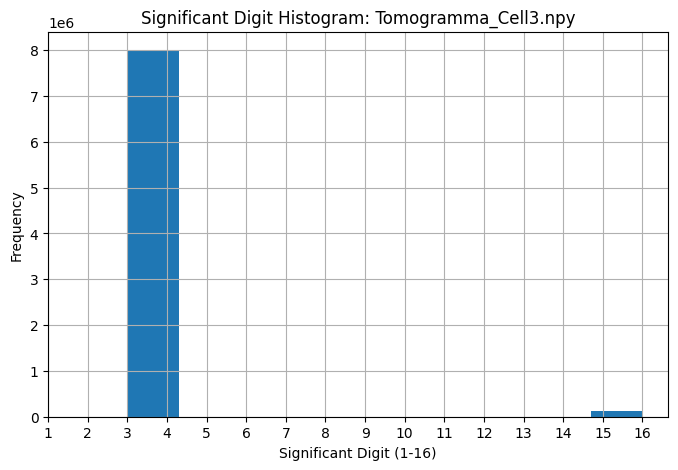

Ignored file .: 7
Ignored file .: 8


In [49]:
# def significant_digits(val):
#     s = f"{val:.18e}".split('e')[0].replace('.', '').lstrip('0')
#     return len(s)

#   useful for checking how many digits "matter" in terms of numerical precision.
from  pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt

from path_manager import addpath
paths = addpath()
from listspecificfiles import readlistFiles
data_path = r"data\raw_npyData"  # relative path with r""relativepath"
files = readlistFiles(data_path,'.npy')
fpath = files.file_with_Path()  # file with path name.

# Directory to save histograms
BASE_DIR = Path.cwd().parent
save_dir = BASE_DIR/"results"/"histogram_significantDigits"
os.makedirs(save_dir,exist_ok=True)

# def significant_digits(val):
#     """Extract first significant digit (ignores sign and zeros)."""
#     val = float(val)
#     if val == 0:
#         return 0
#     my_strVal = str(val)  
#     return int(my_strVal.lstrip('-0.')[0])

# def decimal_places(val):
#         s = f"{val:.18f}".rstrip('0')
#         if '.' in s:
#             return len(s.split('.')[1])
#         return 0

from decimal import Decimal
def actual_significant_digits_after_decimal(val):
    """Returns number of digits after the decimal in original float (ignoring trailing zeros)."""
    if val == 0:
        return 0
    d = Decimal(str(val)).normalize()
    if '.' not in str(d):
        return 0
    return len(str(d).split('.')[1].rstrip('0'))

countfile =0
for FileWithPath in fpath:
    countfile +=1
    if countfile <=5 or countfile >=7 :
        print(f"Ignored file .: {countfile}")
        # break
        continue
    print(f"processing file no.: {countfile}")
    # filename = os.path.basename(FileWithPath)
    # print(f"processing filename: {filename}")
    # data = np.load(FileWithPath)
    # data = data.flatten().reshape(-1,1)
    # # data = data.flatten()
    # print(f" shape of data: {data.shape[0]}")
    # significant_digit_data = []
    # countloop = 0
    # for val in data:
    #     countloop +=1
    #     # print(f"val:{val} and Type: {type(val)} and extract val = {val[0]} and type of val[0] : {type(val[0])}")
    #     # output : val:[1.334] and Type: <class 'numpy.ndarray'> and extract val = 1.334 and type of val[0] : <class 'numpy.float64'>
    #     val = val[0]
    #     if countloop == 3:
    #         break
    #     significant_values = significant_digits(val)
    #     if significant_values <= 9:
    #         print(significant_values)
    #     significant_digit_data.append(significant_values)

    # plt.hist(significant_digit_data)
    # plt.title(filename[:-4].title())
    # plt.ylim([0,500])
    # # save_path = save_dir/f"{filename[:-4]}"
    # # plt.savefig(save_path,dpi=300)
    # plt.show()        


    filename = os.path.basename(FileWithPath)
    print(f"Processing filename: {filename}")
    
    # Load and flatten data
    data = np.load(FileWithPath)
    data = data.flatten()
    print(f"Shape of data: {data.shape[0]}")
    
    # Extract first significant digit
    # significant_digit_data = [significant_digits(val) for val in data if val != 0]
    significant_digit_data = [actual_significant_digits_after_decimal(val) for val in data if val != 0]

    # Plot histogram
    UniqueValues = UniqueValueCount(significant_digit_data)[0] 
    print(F"HERE precision  digits in the data values: {max(UniqueValues)}")
    plt.figure(figsize=(8, 5))
    # counts, bins, _ = plt.hist(significant_digit_data, bins=np.arange(1, 11) - 0.5, edgecolor='black', rwidth=0.8)
    plt.hist(significant_digit_data)
    plt.title(f"Significant Digit Histogram: {filename}")
    plt.xlabel(f"Significant Digit (1-{max(UniqueValues)})")
    plt.ylabel("Frequency")
    # plt.ylim([0,8000])
    plt.xticks(range(1, max(UniqueValues)+1))
    plt.grid(True)
    plt.show()
    # Save the figure
    # hist_path = os.path.join(save_dir, f"{filename[:-4]}_histogram.png")
    # plt.savefig(hist_path)
    # plt.close()

    # Optional: Print most common digit
    # most_common_digit = np.argmax(counts) + 1  # bins are 1-indexed
    # print(f"Most frequent significant digit: {most_common_digit}")



In [ ]:
print(f"min val: {min(significant_digit_data)} and max val :{max(significant_digit_data)},len: {len(significant_digit_data)}")
most_common_digit = np.argmax(significant_digit_data) + 1
print(most_common_digit)
significant_digit_data[most_common_digit -1]

In [ ]:
# tested working fin eto count the number after the decimal(howmany decimal place number exist in a number.) --> give the precision plac eof the given number. 
#  AS I HAVE Seen in Matlab , it was 16 digits precision in data values.

c =0
cdeclist =[]
for val in data:
    c +=1
    
    strval = str(val)
    # rawstrip = strval.split('.')
    cdec1 = strval.split('.')[1].rstrip('0')
    # cdec0 = strval.split('.')[0].lstrip('0')
    # print(f"cdecl: {cdec1} and cdec0:{cdec0} and original val: {strval}     {rawstrip}")
    print(cdec1)
    cdeclist.append(len(cdec1))
    # print(f"{val} and {type(val)}")
    
    # if len(cdec) >= 14:
    #     print(f"decimal value till 7 place:{cdec}")
    if c == 10:
        print(f"decimal value till 7 place:{c}")
        break

334
334
334
334
334
334
334
334
334
334
decimal value till 7 place:10


In [48]:
print(f"{cdeclist} and {type(cdeclist[1])}")

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3] and <class 'int'>


In [ ]:
x ="1.334000000000000"
len(x)
for val in data:
    print
x.split('.')[1].rstrip('0')

In [ ]:
from decimal import Decimal
def actual_significant_digits_after_decimal(val):
    """Returns number of digits after the decimal in original float (ignoring trailing zeros)."""
    if val == 0:
        return 0
    d = Decimal(str(val)).normalize()
    if '.' not in str(d):
        return 0
    return len(str(d).split('.')[1].rstrip('0'))

dec_place = []
for val in data:
      decimal_placesinEcahVal = actual_significant_digits_after_decimal(val)
      dec_place.append(decimal_placesinEcahVal)
      print(f"decimal values:{decimal_placesinEcahVal}")

# data.shape
# c =0
# for val in data:
#     c +=1
#     print(f"{val} and {type(val)}")
    
#     if c == 5:
#         break

In [1]:
float_array = np.array([0.0122502, 1.2302355, -1.02415, 0.00034001, 10.000123])
from decimal import Decimal
def actual_significant_digits_after_decimal(val):
    """Returns number of digits after the decimal in original float (ignoring trailing zeros)."""
    if val == 0:
        return 0
    d = Decimal(str(val)).normalize()
    if '.' not in str(d):
        return 0
    return len(str(d).split('.')[1].rstrip('0'))

dec_place = []
for val in float_array:
      decimal_placesinEcahVal = actual_significant_digits_after_decimal(val)
      dec_place.append(decimal_placesinEcahVal)
      print(f"decimal values:{decimal_placesinEcahVal}")

    

NameError: name 'np' is not defined

In [ ]:
plt.hist(dec_place)
plt.title('hist')
plt.show()

In [ ]:
val = 123.782
print(f"val : {val:.9e}")
# res= significant_digits(val)
# res

In [ ]:
import os
import numpy as np
import pandas as pd
from pathlib import Path

def analyze_decimal_precision_npy(folder_path):
    folder = Path(folder_path)
    print(folder_path)
    result_rows = []

    def decimal_places(val):
        s = f"{val:.18f}".rstrip('0')
        if '.' in s:
            return len(s.split('.')[1])
        return 0

    def significant_digits(val):
        s = f"{val:.18e}".split('e')[0].replace('.', '').lstrip('0')
        return len(s)

    for file in folder.glob("*.npy"):
        data = np.load(file)
        flat_data = data.flatten()
        nonzero_data = flat_data[flat_data != 0]

        if len(nonzero_data) == 0:
            continue

        dec_places_list = [decimal_places(v) for v in nonzero_data]
        sig_digits_list = [significant_digits(v) for v in nonzero_data]

        max_dec_places = max(dec_places_list)
        max_sig_digits = max(sig_digits_list)

        # Get values with the most decimal places
        max_dec_values = nonzero_data[np.array(dec_places_list) == max_dec_places]

        # Group by decimal place count
        unique_dec_counts, dec_counts = np.unique(dec_places_list, return_counts=True)

        # Prepare summary row
        row = {
            'File': file.name,
            'Max Decimal Places': max_dec_places,
            'Max Significant Digits': max_sig_digits,
            'Total Elements': len(flat_data),
            'Nonzero Elements': len(nonzero_data),
            'Values with Max Decimal Places': "; ".join([f"{v:.18f}" for v in max_dec_values[:3]]) + (" ..." if len(max_dec_values) > 3 else "")
        }

        # Add grouped counts
        for d, count in zip(unique_dec_counts, dec_counts):
            row[f"Decimals={d} Count"] = count

        result_rows.append(row)

    # Convert to DataFrame
    df = pd.DataFrame(result_rows)

    # Save to CSV
    output_csv = Path(BASE_DIR/"results"/"decimal_precision_report.csv")
    df.to_csv(output_csv, index=False)

    return df, output_csv

# Run the function on a sample folder (adjust path accordingly)


In [ ]:
sample_folder = data_path
df_result, csv_path = analyze_decimal_precision_npy(sample_folder)

# import ace_tools as tools 
# tools.display_dataframe_to_user(name="Decimal Precision Analysis", dataframe=df_result)
# csv_path


In [ ]:
# x = range(5)
x = [0,1,2,3,4,5]
print(x)
ll1 = [1,1,3,4,4,6,5,4,4,0,0,0,55,65]
for val in ll1:
    x.append(val)
un1 = np.unique(x)
count = np.unique_counts(x)
print(f"x as original:{x} \n un1:{un1} and count:{count}")

In [ ]:
""" 
    Compute the non-zero differences in sorted data
    Plot a histogram of spacing (difference values)
    Optionally zoom in on small-scale structure (e.g., 99th percentile or top N smallest)
 """
import numpy as np
import matplotlib.pyplot as plt

def plot_diff_distribution(data_array, file_label="Data", show_log=False, zoom_percentile=None):
    """
    Visualize the distribution of spacing (differences) in sorted data.

    Parameters:
        data_array (np.ndarray): Flattened array of values.
        file_label (str): Label for title or saving (default "Data").
        show_log (bool): If True, plot x-axis in log scale.
        zoom_percentile (float): Zoom into differences below this percentile (e.g., 99.0).
    """
    # Flatten and sort
    sorted_data = np.sort(data_array.flatten())

    # Compute differences
    diffs = np.diff(sorted_data)

    # Filter out near-zero diffs (due to float precision or repeats)
    diffs = diffs[np.abs(diffs) > 1e-12]

    # Optional zoom
    if zoom_percentile:
        cutoff = np.percentile(diffs, zoom_percentile)
        diffs = diffs[diffs <= cutoff]
        print(f"Zooming into differences <= {cutoff:.9f} (percentile {zoom_percentile})")

    # Plot
    plt.figure(figsize=(10, 5))
    plt.hist(diffs, bins=100, color='skyblue', edgecolor='gray')
    plt.title(f"Histogram of Value Differences ({file_label})")
    plt.xlabel("Spacing Between Consecutive Values")
    plt.ylabel("Frequency")
    if show_log:
        plt.xscale('log')
        plt.xlabel("Log-scaled Spacing")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
from listspecificfiles import readlistFiles
fpaths = readlistFiles(data_path,'.npy').file_with_Path()
for fpath in fpaths:
    data_array = np.load(fpath)
    plot_diff_distribution(data_array, file_label="Data", show_log=False, zoom_percentile=None)

In [ ]:
# data.shape
from posixpath import basename
import numpy as np
from pathlib import Path
import os
import sys
# pathModule = BASE_DIR/"src"/"modules"
# sys.path.append(str(pathModule))
# print(f"pathofmodules:{pathModule}")

from path_manager import addpath
paths = addpath()

from listspecificfiles import*
Relative_data_path = r"data\raw_npyData"

# Relative_data_path = os.path.normpath()
# files = readlistFiles(Relative_data_path,'.npy')
# print(f"full output: {readlistFiles(Relative_data_path,'.npy').file_with_Path()}")
fpath = readlistFiles(Relative_data_path,'.npy').file_with_Path() 
for file in fpath:
    data = np.load(file)
    print(file)
    uniquedata = np.unique_counts(data)
    print(f"data shape : {data.shape} \n unique Count: {uniquedata.counts} \n unique_values: {uniquedata.values} and \n now see the differencs: { data.shape[0] - uniquedata.counts.shape[0]} ")
    # datadic = {f"{basename[:-4]}_shape":{data.shape}}

In [ ]:
most_valuesInData = data[data == 1.33] ; print(f"total values in this:{most_valuesInData.shape} and data : {data.shape} ");

In [ ]:
# # hybrid_kmeans_dbscan.py

# import numpy as np
# import os
# import scipy.io as sio
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans, DBSCAN
# from sklearn.preprocessing import StandardScaler
# from mpl_toolkits.mplot3d import Axes3D

# # THRESHOLD_VALUE = 1.334
# def load_volume(filepath,THRESHOLD_VALUE):
#     if filepath.endswith('.npy'):
#         volume = np.load(filepath)
#         volume[volume <= THRESHOLD_VALUE] = 0  # Threshold to remove background
#     elif filepath.endswith('.mat'):
#         mat = sio.loadmat(filepath)
#         # Assuming your volume variable is named 'volume' in .mat
#         volume = next(v for v in mat.values() if isinstance(v, np.ndarray) and v.ndim == 3)
#         volume[volume <= THRESHOLD_VALUE] = 0  # Threshold to remove background
#     else:
#         raise ValueError("Unsupported file format. Use .mat or .npy")
#     return volume

# def extract_features(volume):
#     coords = np.array(np.nonzero(volume)).T
#     intensities = volume[volume > 0].flatten().reshape(-1, 1)
#     return np.hstack((coords, intensities))

# def run_kmeans(X_scaled, n_clusters=4):
#     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#     return kmeans.fit_predict(X_scaled)

# def run_dbscan_per_cluster(X_scaled, kmeans_labels, eps=0.6, min_samples=5):
#     final_labels = -np.ones(len(X_scaled), dtype=int)
#     label_offset = 0
#     for cluster_id in np.unique(kmeans_labels):
#         indices = np.where(kmeans_labels == cluster_id)[0]
#         db = DBSCAN(eps=eps, min_samples=min_samples)
#         sub_labels = db.fit_predict(X_scaled[indices])
#         sub_labels[sub_labels != -1] += label_offset
#         final_labels[indices] = sub_labels
#         label_offset += sub_labels.max() + 1 if sub_labels.max() != -1 else 0
#     return final_labels

# def save_results(output_dir, labels, coords):
#     os.makedirs(output_dir, exist_ok=True)
#     np.save(os.path.join(output_dir, "cluster_labels.npy"), labels)
#     sio.savemat(os.path.join(output_dir, "cluster_labels.mat"), {"labels": labels})
#     np.save(os.path.join(output_dir, "voxel_coords.npy"), coords)


# def plot_clusters(coords, labels, title="Cluster Visualization"):
#     fig = plt.figure(figsize=(10, 7))
#     ax = fig.add_subplot(111, projection='3d')
#     scatter = ax.scatter(coords[:, 0], coords[:, 1], coords[:, 2], c=labels, cmap='tab20', s=2)
#     plt.title(title)
#     plt.colorbar(scatter)
#     plt.show()

# # # Example use:
# volume = load_volume("yourfile.mat")
# X = extract_features(volume)
# X_scaled = StandardScaler().fit_transform(X)
# kmeans_labels = run_kmeans(X_scaled, n_clusters=4)
# final_labels = run_dbscan_per_cluster(X_scaled, kmeans_labels)
# plot_clusters(X[:, :3], final_labels)
# save_results("output_dir", final_labels, X[:, :3])


In [ ]:
# ! reset -f

In [ ]:
import scipy.io as sio
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import json
# from basicstatics import basicstat
from scipy.io import savemat

from pathlib import Path
from path_manager import AddPath
import sys

sys.path.append(r"C:\Users\Gaetano\Desktop\create_with_codeRafi\MyProjects\Substructure_Different_DataTypes\src\modules")
from createmat2npyViceVersa import npy2mat 

datapath = r"C:\Users\Gaetano\Desktop\create_with_codeRafi\MyProjects\Substructure_Different_DataTypes\src\clustering_output"
outputdatapath = r"C:\Users\Gaetano\Desktop\create_with_codeRafi\MyProjects\Substructure_Different_DataTypes\src\clustering_output\convertedmatfiles"

npy2mat(datapath=datapath,outputdatapath=outputdatapath)

# I've created a working .py script that:
-  #  load either .mat or .npy files,
-  # Applies K-Means followed by DBSCAN
-  #  Visualizes clusters using matplotlib in 3D
-  #  Saves cluster labels and voxel coordinates to both .npy and .mat formats
-  # Created an output directory automatically for saved files



In [ ]:
from hybrid_kmeans_dbscan import *
import os 
from pathlib import Path
import random

SRCFILES  = Path.cwd().parent
DATAFILES  = SRCFILES/"data"/"raw_npyData"

listfiles = os.listdir(str(DATAFILES))
Datafile = random.choice(listfiles)

print(f" --------------->  check step by step : SRCFILES: {SRCFILES} --> DATAFILES: {DATAFILES} --> \n listfiles: {listfiles} \n --> Datafile random choice: {Datafile}")
# Datafile = r"C:\Users\Gaetano\Desktop\create_with_codeRafi\MyProjects\Substructure_Different_DataTypes\data\raw\Tomogramma_BuddingYeastCell.mat"
FileCompletePath = os.path.join(DATAFILES,Datafile)
THRESHOLD_VALUE = 1.334

volume = load_volume(FileCompletePath,THRESHOLD_VALUE)  # or .npy

X = extract_features(volume)

X_scaled = StandardScaler().fit_transform(X)

kmeans_labels = run_kmeans(X_scaled, n_clusters=4)
final_labels = run_dbscan_per_cluster(X_scaled, kmeans_labels, eps=0.6, min_samples=20)

plot_clusters(X[:, :3], final_labels, title="Final Clusters")

save_results("clustering_output", final_labels, X[:, :3])

# for invoking the open3d plot function ------>
# SRCFILES  = Path.cwd()
# RESFilesINsrc = SRCFILES/"clustering_output/"
# print(RESFilesINsrc)
 
# clusteredNPY_Path = os.path.join(str(RESFilesINsrc),'cluster_labels.npy')
# clusteredNPY_Coords = os.path.join(str(RESFilesINsrc),'voxel_coords.npy')

# VisualizeOpen3d(clusteredNPY_Path,clusteredNPY_Coords)

In [ ]:
coordCluster = np.load(r"C:\Users\Gaetano\Desktop\create_with_codeRafi\MyProjects\Substructure_Different_DataTypes\src\clustering_output\voxel_coords.npy")
clusterLabels = np.load(r"C:\Users\Gaetano\Desktop\create_with_codeRafi\MyProjects\Substructure_Different_DataTypes\src\clustering_output\cluster_labels.npy")
# clusterLabels.shape
print(f"coord: {coordCluster.shape} and \n {coordCluster[1:5,:]} \n  and \n cluster labels: {clusterLabels.shape}\n {clusterLabels[1:5]}")


In [ ]:
# SRCFILES  = Path.cwd()
# RESFilesINsrc = SRCFILES/"clustering_output/"
# print(RESFilesINsrc)

import numpy as np
import open3d as o3d
import os
from pathlib import Path

SRCFILES  = Path.cwd()
RESFilesINsrc = SRCFILES/"clustering_output/"
print(RESFilesINsrc)
 
clusteredNPY_Path = os.path.join(str(RESFilesINsrc),'cluster_labels.npy')
clusteredNPY_Coords = os.path.join(str(RESFilesINsrc),'voxel_coords.npy')

print(f" here to check the final path : {clusteredNPY_Path},\n --{clusteredNPY_Coords} <----------------------\n" )


label_path = clusteredNPY_Path
coord_path = clusteredNPY_Coords 

from meshvisClustCordLabels import *
visualize_and_save_clusters(label_path, coord_path, output_dir="o3d_clusters")

## here below the code which test only k-means with coordinates and intensity as features save all parameters in .mat format  
### in second run : I just consider the intesnsity values for k-means clustering. 

In [ ]:
# Hybrid Clustering with K-Means + DBSCAN for 3D Volume Data

import os
import numpy as np
import scipy.io as sio
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler 
import open3d as o3d
import matplotlib.pyplot as plt

# --- USER OPTIONS ---

import os 
from pathlib import Path
import random

SRCFILES  = Path.cwd().parent
# SRCFILES  = Path(__file__).resolve().parent.parent

DATAFILES  = SRCFILES/"data"/"raw_npyData"

listfiles = os.listdir(str(DATAFILES))

for filename in listfiles:
    if filename.endswith('.npy'):
        DATAFILE_NAME = filename
# Datafile = random.choice(listfiles)
# DATAFILE_NAME = "AML2_cell11.npy"  # data\raw_npyData\tomo_Grafene_24h.npy
# DATAFILE_NAME = "tomo_Grafene_24h.npy"  #  data\raw_npyData\tomo_Grafene_24h.npy
        DATAFILES = str(DATAFILES)
        input_path = os.path.join(DATAFILES,DATAFILE_NAME)
        print(f"input path : {input_path}")
        

# for file in listfiles:
#     if file == DATAFILE_NAME:
#         DATAFILES = str(DATAFILES)
#         input_path = os.path.join(DATAFILES,DATAFILE_NAME)
#         print(f"input path : {input_path}")
        
# print(f" --------------->  check step by step : SRCFILES: {SRCFILES} --> DATAFILES: {DATAFILES} --> \n listfiles: {listfiles} \n --> Datafile random choice: {Datafile}")
# Datafile = r"C:\Users\Gaetano\Desktop\create_with_codeRafi\MyProjects\Substructure_Different_DataTypes\data\raw\Tomogramma_BuddingYeastCell.mat"

        # Choose input type
        input_type = "npy"   #"mat"   or "npy"
        input_path = input_path  # or .npy
        volume_key = "volume"  # for .mat file: key inside the .mat dict

        # output_dir = "cluster_output"
        output_dir = SRCFILES/"results"/"hybrid_Kdbcluster"
        kmeans_k = 7

        # --- LOAD VOLUME DATA ---
        if input_type == "mat":
            mat_data = sio.loadmat(input_path)
            volume = mat_data[volume_key]
        elif input_type == "npy":
            volume = np.load(input_path)
            # to reduce the size of data volume.
            # x_row,y_row,z_row = volume.shape
            # volume = volume[:x_row/2,:y_row/2,:z_row/2]
            # volume = volume[::5, ::5, ::5]

        else:
            raise ValueError("Invalid input_type. Choose 'mat' or 'npy'.")

        # --- EXTRACT NONZERO VOXELS AS POINT CLOUD ---
        coords = np.array(np.nonzero(volume)).T  
        # it will returns the coordinate of each nonzero values in volume and formate will be like this [[]
        # coords =
        # [z1,x1,y1]
        # [z2,x2,y2]
        # ........
        # [zn,xn,yn]]

        # intensities = volume[volume > 0].reshape(-1, 1)
        intensities = volume[volume != 0].reshape(-1, 1)  # beacuse 48 hour data has some negative values.
        # X = np.hstack((coords, intensities))  # shape: (N, 4)
        X = np.hstack((coords,intensities))  # shape: (N, 4)
        # np.hstack() horizontally stacks arrays (i.e., along columns / axis=1), meaning it concatenates them side by side. a = [[1],[2],[3]] , b = [[10],[20],[30]]
        # np.hstack(a,b) --> results will be [[1,10],[2,20],[3,30]]
        X1 = X[:,3]
        X2 = X1.reshape(-1, 1)
        # --- SCALE FEATURES ---
        X_scaled = StandardScaler().fit_transform(X2)   # Z-score scaling/normalization -> zero mean, unit variance

        # --- APPLY K-MEANS ---
        kmeans = KMeans(n_clusters=kmeans_k,init = 'k-means++', random_state=42).fit(X_scaled)
        # kmeans = KMeans(n_clusters=kmeans_k, init = 'k-means++', random_state=42).fit(X)
        kmeans_labels = kmeans.labels_   # kmeans.labels_ --> kmeans_labels is one row (1xN) of labels (0,1,.., n_clusters -1) as output → array of cluster assignments for each data point, storing the cluster labels for all samples in the kmeans_labels variable, so you can use them later for saving or analyzing clusters / future use.

        # <------------ For saving the k-means cluster and corresponding coordinates results -------- >
        kmeans_coords_with_labels = np.hstack((coords, kmeans_labels.reshape(-1, 1)))  # [x, y, z, kmeans_label]
        # Save as .npy
        kmeans_intResultDir = os.path.join(output_dir,f"kmIntensity{DATAFILE_NAME[:-4]}")
        os.makedirs(kmeans_intResultDir,exist_ok=True)
        np.save(os.path.join(kmeans_intResultDir, "kmeans_coords_labels.npy"), kmeans_coords_with_labels)
        # Save as .mat
        sio.savemat(os.path.join(kmeans_intResultDir, "kmeans_coords_labels.mat"), {"kmeans_coords_labels": kmeans_coords_with_labels})



- ## here test the code at each satement one by one.

In [ ]:
import numpy as np

volume = np.array([
    [[0.5, 1.4],
     [1.0, 1.5]],

    [[1.3, 1.2],
     [1.6, 0]]
])

volume1 = volume.reshape(4,2)
volume2 = volume1[:,1]
print(f"reshape: {volume1},\n  and \n {volume1[:,1]} and {volume2.shape}") 

In [ ]:
import numpy as np

# Define a small 3D array
volume = np.array([
    [[0.5, 1.4],
     [1.0, 1.5]],

    [[1.3, 1.2],
     [1.6, 0]]
])
print(f"size of vol: {volume.shape} \n")
coords = np.array(np.nonzero(volume))
print(f"size of nonzeros : {np.nonzero(volume)} \n")
#  here np.nonzero(volume) -> returns the (z,x,y) coordinates of all nonzero points --> 
#  output size of nonzeros : (array([0, 0, 0, 0, 1, 1, 1]), array([0, 0, 1, 1, 0, 0, 1]), array([0, 1, 0, 1, 0, 1, 0]))
# coord:
#  [[0 0 0 0 1 1 1]
#  [0 0 1 1 0 0 1]
#  [0 1 0 1 0 1 0]]

coordst = np.array(np.nonzero(volume)).T
print(f"coord:\n {coords}\n  and \n taranspose: \n \n {coordst}")
# taranspose: 
#  [[0 0 0]
#  [0 0 1]
#  [0 1 0]
#  [0 1 1]
#  [1 0 0]
#  [1 0 1]
#  [1 1 0]]

# thres = 1.3
# volume[volume <= thres] = 0
# print("Original Volume:\n",volume)
# volume

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import os
import numpy as np
import scipy.io as sio
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import open3d as o3d
import matplotlib.pyplot as plt


# Create 3D grid coordinates (4,3,3) = 36 points
x, y, z = np.meshgrid(np.arange(4), np.arange(3), np.arange(3), indexing='ij')
coords = np.stack((x.ravel(), y.ravel(), z.ravel()), axis=1)

# Random intensity values between 50 and 200
intensity = np.random.uniform(50, 200, size=(coords.shape[0], 1))

# Combine coords + intensity
X = np.hstack((coords, intensity))

# Apply standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Print first 5 for illustration
print(f"Original Data (X):\n, {X[:5]}  and  {X.shape}")
print("\nScaled Data (X_scaled):\n", X_scaled[:5])
kmeans_k =3
kmeans = KMeans(n_clusters=kmeans_k,init = 'k-means++',random_state=42).fit(X_scaled)
# kmeans = KMeans(n_clusters=kmeans_k, init = 'k-means++', random_state=42).fit(X)
kmeans_labels = kmeans.labels_   
final_labels = -np.ones(len(X), dtype=int)  # Prepares an array to hold your final clustering labels. -1 means unassigned/outlier (just like DBSCAN does).Example: If X has 1000 points → final_labels = [-1, -1, ..., -1] (length 1000)

label_offset = 0

for cluster_id in np.unique(kmeans_labels):
    print(f"i have compl k-means now in dbsacn, cluster_id: {cluster_id}")
    indices = np.where(kmeans_labels == cluster_id)[0]  #  indices = np.where(kmeans_labels == cluster_id) --> indices returns tuple of array like -> (array([1, 4]),) to extract use [0] first array(np.where(kmeans_labels == cluster_id))[0] and get result like this # array([1, 4])
    
    X_sub = X_scaled[indices] # here extracting the coordinate and intensity value according to the cluster_id. [X_scaled size is: (N, 4)]
    # X_sub = X[indices]

    db = DBSCAN(eps= 0.8, min_samples=5).fit(X_sub)  # db scan here in each loop for each cluster further.
    db_labels = db.labels_
    db_labels[db_labels != -1] += label_offset
    final_labels[indices] = db_labels
    label_offset += db_labels.max() + 1


In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Create a moon-shaped dataset
X, y = make_moons(n_samples=300, noise=0.5, random_state=42)

# Normalize
X_scaled = StandardScaler().fit_transform(X)

# Plot original data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='gray', edgecolor='k')
plt.title("Input Data (Normalized)")
plt.show()


In [ ]:
# Apply DBSCAN
db = DBSCAN(eps=0.3, min_samples=5)
# labels = db.fit_predict(X_scaled)
clusters = db.fit(X_scaled)
db_labels = clusters.labels_
l0 = []
l1 = []
for l in db_labels:
    # print(f"lables:{l}")
    if l == 0:
        l0.append(int(l))
    else:
        l1.append(int(l))

print(f"l0 index:{l0} and \n  l1 index:{l1}")



In [ ]:
ulab =np.unique(db_labels)
print(ulab)
label_offset =0 
db_labels[db_labels != -1] += label_offset
print(db_labels)
# final_labels[indices] = db_labels
label_offset += db_labels.max() + 1

In [ ]:
import numpy as np

print("Labels assigned:", np.unique(labels))
print("Noise points (label == -1):", list(labels).count(-1))
plt.figure(figsize=(8, 4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='Set1', edgecolor='k')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
dc = np.load(r"E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\src\clustering_output\voxel_coords.npy")
print(dc.shape)
# from scipy.io import loadmat
# fd = loadmat(r"E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\results\hybrid_Kdbcluster\cluster_labels.mat")
# print(fd['labels'].shape)

In [ ]:
import numpy as np
data1 = np.load(r"E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\data\raw_npyData\Tomogramma_BuddingYeastCell.npy")
data2 = data1[:50,:50,:50]
size1 = data2.shape
print(data2.shape[0],data2.shape[1],data2.shape[2],"\n --" )
print(f"size: {size1[0]}\n {size1[1]}\n {size1[2]}")
print(f"data1 shape: {data1.shape} \n data2 shape: {data2.shape}")


In [ ]:
import numpy as np

kmeans_labels = np.array([0, 1, 0, 2, 1, 2, 0])
cluster_id = 0

indices = np.where(kmeans_labels == cluster_id)
print(indices)  # (array([1, 4]),)

indices = np.where(kmeans_labels == cluster_id)[0]
print(indices)  # array([1, 4])


In [ ]:
# import numpy as np
# Adjust parsing to handle np.float64(...) formatting using regular expressions
import re
import os
from pathlib import Path
import pandas as pd
import ast

# Reload the file after execution reset
# txt_path = 'results\featureQuantileThres\AllFeatures_Stats.txt'
# import os

txt_path = r"E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\results\featureQuantileThres\AllFeatures_Stats.txt"
txt_path = os.path.normpath(txt_path)
print(f"txt_path: {txt_path}")

rows = []

with open(txt_path, 'r') as file:
    for line in file:
        if ':' in line:
            name, data_str = line.split(':', 1)
            # Replace np.float64(...) with float values using regex
            cleaned_data_str = re.sub(r'np\.float64\((.*?)\)', r'\1', data_str.strip())
            data_dict = ast.literal_eval(cleaned_data_str)
            data_dict = {k: float(v) for k, v in data_dict.items()}
            data_dict['Filename'] = name.strip()
            rows.append(data_dict)

# Convert to DataFrame
df = pd.DataFrame(rows)

# Reorder columns to start with Filename
cols = ['Filename'] + [col for col in df.columns if col != 'Filename']
df = df[cols]

# Save as CSV
BASE_DIR = Path.cwd().parent
csv_path = BASE_DIR/ "results"/ "featureQuantileThres"

csv_file = "AllFeatures_Stats_Converted.csv" # Save CSV locally
csv_path = os.path.join(csv_path,csv_file)

# df.to_csv("AllFeatures_Stats_Converted.csv", index=False)
df.to_csv(csv_path, index=False)

print("CSV file saved as AllFeatures_Stats_Converted.csv")



In [ ]:
import numpy as np
import open3d as o3d
from skimage.measure import marching_cubes
from pathlib import Path
import os

def create_mesh_from_mask(data, mask, title="Mesh", transparency=0.3):
    if not np.any(mask):
        print(f"⚠️ No points in {title}. Skipping visualization.")
        return

    try:
        verts, faces, _, _ = marching_cubes(data * mask, level=0)
    except Exception as e:
        print(f"⚠️ Mesh creation failed for {title}: {e}")
        return

    mesh = o3d.geometry.TriangleMesh()
    mesh.vertices = o3d.utility.Vector3dVector(verts)
    mesh.triangles = o3d.utility.Vector3iVector(faces)
    mesh.compute_vertex_normals()
    mesh.paint_uniform_color([0.4, 0.6, 1.0])
    mesh = mesh.filter_smooth_simple(number_of_iterations=1)

    app = o3d.visualization.gui.Application.instance
    app.initialize()
    window = app.create_window(title, 1024, 768)
    scene = o3d.visualization.rendering.Open3DScene(window.renderer)

    mat = o3d.visualization.rendering.MaterialRecord()
    mat.shader = "defaultLitTransparency"
    mat.base_color = [0.4, 0.6, 1.0, transparency]
    mat.base_roughness = 0.5

    scene.add_geometry("mesh", mesh, mat)
    bbox = mesh.get_axis_aligned_bounding_box()
    
    center = bbox.get_center()
    eye = center + np.array([0, 0, -1])  # Convert to NumPy array
    up = [0, -1, 0]

    scene.scene.camera.look_at(center, eye, up)

    # scene.scene.camera.look_at(
    # bbox.get_center(),           # center
    # bbox.get_center() + [0, 0, -1],  # eye position
    # [0, -1, 0]                   # up vector
    # )

    # scene.setup_camera(60, bbox, bbox.get_center())

    def on_layout(context):
        r = window.content_rect
        scene.scene.set_viewport(r)

    window.set_on_layout(on_layout)
    app.run()

def threshold_and_visualize(npy_file_path, threshold_val=1.20148978654012):
    print(f"CAN SEE THE NPYPATH : {npy_file_path}")
    # data = np.load(str(npy_file_path))
    data = np.load(npy_file_path)
    if data.ndim != 3:
        raise ValueError("Expected a 3D numpy array.")

    print(f"📁 Loaded: {npy_file_path.name} with shape {data.shape}")
    
    mask_lower = data <= threshold_val
    mask_upper = data > threshold_val

    # create_mesh_from_mask(data, mask_lower, title="Lower Threshold Mesh", transparency=0.1)
    create_mesh_from_mask(data, mask_upper, title="Upper Threshold Mesh", transparency=0.2)


# ====== Replace this with your actual .npy file path ======
# import os

# filepath = r"E:\Projects\substructure_3d_data\Substructure_Different_DataTypes\data\raw_npyData"
# npy_path = os.path.join(filepath,'tomo_Grafene_24h.npy')
# # npy_path = Path("path/to/your/datafile.npy")  # 🛠️ Replace this path
# threshold_and_visualize(npy_path, threshold_val=1.44148978654012)


In [ ]:
from pathlib import Path

# Safe path definition
filepath = Path(r"E:/Projects/substructure_3d_data/Substructure_Different_DataTypes/data/raw_npyData")
npy_path = filepath / "tomo_Grafene_24h.npy"

threshold_and_visualize(npy_path, threshold_val=1.201978654012)


In [ ]:
import numpy as np
thres = 5
array = np.random.randint(0,10,size=(5,5,5))
print(array)
data = array > thres
print(f"\n data --> {thres} --> \n {data} \n")

In [ ]:
# data

In [ ]:
import numpy as np
thres = 0.5
array = np.random.rand(2,2,2)
print(array)
data = array > thres
print(f"\n data --> {thres} --> \n {data} \n")
array = array
print(f"arraysize:{array.shape} \n and \n {array} \n " )

import numpy as np
import open3d as o3d
from skimage.measure import marching_cubes
from scipy.io import loadmat  # For .mat support
# volume = np.load('data')
verts,faces,_, _ = marching_cubes(data,level=0)
mesh = o3d.geometry.TriangleMesh()
mesh.vertices = o3d.utility.Vector3dVector(verts)
mesh.triangles = o3d.utility.Vector3iVector(faces)
mesh.compute_vertex_normals()
mesh.paint_uniform_color([0.6, 0.2, 1.0])

# Visualize
o3d.visualization.draw_geometries([mesh])

In [ ]:
import numpy as np
import open3d as o3d
from skimage.measure import marching_cubes

# Simulated 3D data (a sphere)
# x, y, z = np.indices((100, 100, 100))
# sphere = (x - 50)**2 + (y - 50)**2 + (z - 50)**2
# volume = np.exp(-sphere / 500)  # Smooth decay
data = np.zeros((2, 3, 3))
data[1, 1, 1] = 1.0 
# data[1, 1, 2] = 1.5 
# data[1, 2, 2] = 1.8

print(data)
# Threshold
# threshold = 0.5
# binary = volume > threshold

# Mesh
# verts, faces, _, _ = marching_cubes(volume * binary, level=0)
verts, faces, _, _ = marching_cubes(data, level=0)
mesh = o3d.geometry.TriangleMesh()
mesh.vertices = o3d.utility.Vector3dVector(verts)
mesh.triangles = o3d.utility.Vector3iVector(faces)
mesh.compute_vertex_normals()
mesh.paint_uniform_color([0.6, 0.2, 1.0])

# Visualize
o3d.visualization.draw_geometries([mesh])

## this below code is workin fine even if large data size is there. make a function or class of it , and use it when required.
## but in line at this position just increase the size here: 
- if simplify:
   - voxel_size = max(volume.shape) / 64  # can vary value from 64-128-256-512 etc to smooth the visualization. 

In [ ]:
# this is workin fine even if large data size is there. make a function or class of it , and use it when required.

import numpy as np
import open3d as o3d
from skimage.measure import marching_cubes
from skimage.filters import threshold_otsu

def load_data(npy_path):
    data = np.load(npy_path)
    assert data.ndim == 3, "Data must be 3D"
    return data

def create_mesh_from_volume(volume, simplify=True):
    # Automatically find threshold using Otsu’s method
    flat = volume[volume > 0].flatten()
    threshold = threshold_otsu(flat)
    print(f"[INFO] Otsu Threshold used: {threshold:.4f}")

    # Marching cubes
    print("[INFO] Extracting mesh using marching cubes...")
    verts, faces, _, _ = marching_cubes(volume, level=threshold)
    print(f"[INFO] Original mesh: {len(verts)} vertices, {len(faces)} faces")

    mesh = o3d.geometry.TriangleMesh()
    mesh.vertices = o3d.utility.Vector3dVector(verts)
    mesh.triangles = o3d.utility.Vector3iVector(faces)
    mesh.compute_vertex_normals()

    if simplify:
        voxel_size = max(volume.shape) / 64  # Tweakable
        mesh = mesh.simplify_vertex_clustering(voxel_size=voxel_size)
        print(f"[INFO] Simplified mesh: {len(mesh.vertices)} vertices, {len(mesh.triangles)} faces")

    mesh.paint_uniform_color([0.6, 0.7, 1.0])
    return mesh

def visualize_mesh(mesh):
#     o3d.visualization.draw_geometries([mesh], mesh_show_back_face=True)
    o3d.visualization.draw_geometries([mesh], mesh_show_back_face=False)

# ========== 🧪 Example ========== #
# npy_path = "path_to_your_large_3d_data.npy"
# volume = load_data(npy_path)
# mesh = create_mesh_from_volume(volume, simplify=True)
# visualize_mesh(mesh)
from pathlib import Path
import os

PROJECT_PATH = Path.cwd().parent
# PROJECT_PATH = Path(__file__).resolve().parent.parent
print(PROJECT_PATH)
resultData = PROJECT_PATH/"results"
npy_path = PROJECT_PATH/"data"/"raw_npyData"
# npy_path = PROJECT_PATH/"data"/"normalized_npyData"
input_npy = npy_path  # <-- Replace with your actual file path
# input_npy = os.listdir(input_npy)
for filename  in os.listdir(input_npy):
    if filename.endswith('.npy'):

        print(f"filename in the path : {filename}")
        # input_npy = input_npy/"Tomogramma_BuddingYeastCell.npy"
    #     input_npy = input_npy/"tomo_Grafene_24h.npy"
        npyfilePath = input_npy/filename
        # input_npy = input_npy/"Tomogramma_BuddingYeastCell_normalized.npy"
    #     volume = load_data(input_npy)
        volume = load_data(str(npyfilePath))
        mesh = create_mesh_from_volume(volume, simplify=True)
        visualize_mesh(mesh)

In [ ]:
print(os.listdir(npy_path))

In [ ]:
import numpy as np
import open3d as o3d
from skimage.measure import marching_cubes
from skimage.filters import threshold_otsu

def load_data(npy_path):
    data = np.load(npy_path)
    assert data.ndim == 3, "Data must be a 3D numpy array"
    return data

def create_mesh_from_volume(volume, grid_factor=128, simplify=True, color_mode='gradient'):
    """
        Enhancements:
        Control grid resolution using grid_factor (affects voxel_size for simplification).
        Color grading based on vertex Z-values (color_mode='gradient') or keep uniform (color_mode='uniform').
        Clear toggles for both via function parameters.
    """
    # Compute Otsu threshold from non-zero values
    flat = volume[volume > 0].flatten()
    threshold = threshold_otsu(flat)
    print(f"[INFO] Otsu Threshold: {threshold:.4f}")

    # Generate mesh using marching cubes
    print("[INFO] Extracting mesh...")
    verts, faces, _, _ = marching_cubes(volume, level=threshold)
    print(f"[INFO] Mesh before simplification: {len(verts)} vertices, {len(faces)} faces")

    mesh = o3d.geometry.TriangleMesh()
    mesh.vertices = o3d.utility.Vector3dVector(verts)
    mesh.triangles = o3d.utility.Vector3iVector(faces)
    mesh.compute_vertex_normals()

    # Simplify mesh
    if simplify:
        voxel_size = max(volume.shape) / grid_factor
        mesh = mesh.simplify_vertex_clustering(voxel_size=voxel_size)
        print(f"[INFO] Mesh after simplification: {len(mesh.vertices)} vertices, {len(mesh.triangles)} faces")

    # Apply color grading
    if color_mode == 'gradient':
        z_vals = np.asarray(mesh.vertices)[:, 2]
        z_min, z_max = z_vals.min(), z_vals.max()
        norm_z = (z_vals - z_min) / (z_max - z_min + 1e-8)
        colors = np.stack([norm_z, 0.6 * np.ones_like(norm_z), 1.0 - norm_z], axis=1)
        mesh.vertex_colors = o3d.utility.Vector3dVector(colors)
    else:
        mesh.paint_uniform_color([0.6, 0.7, 1.0])  # Default blueish

    return mesh

def visualize_mesh(mesh):
    o3d.visualization.draw_geometries([mesh], mesh_show_back_face=True)

# ========== 🧪 Example Usage ========== #
# npy_path = "path_to_your_large_3d_data.npy"
# volume = load_data(npy_path)
# mesh = create_mesh_from_volume(volume, grid_factor=32, simplify=True, color_mode='gradient')
# visualize_mesh(mesh)


In [ ]:
from pathlib import Path
import os

PROJECT_PATH = Path.cwd().parent
# PROJECT_PATH = Path(__file__).resolve().parent.parent
print(PROJECT_PATH)
resultData = PROJECT_PATH/"results"
npy_path = PROJECT_PATH/"data"/"raw_npyData"
# npy_path = PROJECT_PATH/"data"/"normalized_npyData"
input_npy = npy_path  # <-- Replace with your actual file path
# input_npy = os.listdir(input_npy)
for filename  in os.listdir(input_npy):
    if filename.endswith('.npy'):

        print(f"filename in the path : {filename}")
        # input_npy = input_npy/"Tomogramma_BuddingYeastCell.npy"
    #     input_npy = input_npy/"tomo_Grafene_24h.npy"
        npyfilePath = input_npy/filename
        # input_npy = input_npy/"Tomogramma_BuddingYeastCell_normalized.npy"
    #     volume = load_data(input_npy)
        volume = load_data(str(npyfilePath))
        mesh = create_mesh_from_volume(volume, grid_factor=256, simplify=True, color_mode='gradient')
        visualize_mesh(mesh)

In [ ]:
#  improvement using d solution , 

import numpy as np
import open3d as o3d
from skimage.measure import marching_cubes
from skimage.filters import threshold_otsu

def load_data(npy_path):
    data = np.load(npy_path)
    assert data.ndim == 3, "Data must be a 3D numpy array"
    return data

def create_mesh_from_volume(volume, grid_factor=32, simplify=True, color_mode='gradient'):
    # Compute Otsu threshold from non-zero values
    flat = volume[volume > 0].flatten()
    threshold = threshold_otsu(flat)
    print(f"[INFO] Otsu Threshold: {threshold:.4f}")

    # Generate mesh using marching cubes
    print("[INFO] Extracting mesh...")
    verts, faces, _, _ = marching_cubes(volume, level=threshold)
    print(f"[INFO] Mesh before simplification: {len(verts)} vertices, {len(faces)} faces")

    mesh = o3d.geometry.TriangleMesh()
    mesh.vertices = o3d.utility.Vector3dVector(verts)
    mesh.triangles = o3d.utility.Vector3iVector(faces)
    mesh.compute_vertex_normals()

    # Simplify mesh
    if simplify:
        voxel_size = max(volume.shape) / grid_factor
        mesh = mesh.simplify_vertex_clustering(voxel_size=voxel_size)
        print(f"[INFO] Mesh after simplification: {len(mesh.vertices)} vertices, {len(mesh.triangles)} faces")

    # Apply color grading
    if color_mode == 'gradient':
        z_vals = np.asarray(mesh.vertices)[:, 2]
        z_min, z_max = z_vals.min(), z_vals.max()
        norm_z = (z_vals - z_min) / (z_max - z_min + 1e-8)
        # Enhanced color gradient (red to green to blue)
        colors = np.zeros((len(norm_z), 3))
        colors[:, 0] = 1.0 - norm_z  # Red decreases with Z
        colors[:, 1] = norm_z        # Green increases with Z
        colors[:, 2] = norm_z        # Blue increases with Z
        mesh.vertex_colors = o3d.utility.Vector3dVector(colors)
    else:
        mesh.paint_uniform_color([0.6, 0.7, 1.0])  # Default blueish

    return mesh

def visualize_mesh(mesh, transparency=0.5):
    # Create visualizer with material properties
    vis = o3d.visualization.Visualizer()
    vis.create_window()
    
    # Add mesh with material properties
    mat = o3d.visualization.rendering.MaterialRecord()
    mat.shader = "defaultLit"
    
    # Modern Open3D versions use base_alpha instead of transparency
        # Handle version compatibility
    if hasattr(mat, 'transparency'):
        mat.transparency = transparency
    else:
        mat.base_alpha = 1.0 - transparency
    # mat.base_alpha = 1.0 - transparency  # Alpha is inverse of transparency
    
    # Additional material properties for better visualization
    mat.base_roughness = 0.4
    mat.base_metallic = 0.0
    mat.base_color = [1.0, 1.0, 1.0, 1.0]  # RGBA
    
    vis.add_geometry(mesh, material=mat)
    
    # Configure render options
    render_opt = vis.get_render_option()
    render_opt.mesh_show_back_face = True
    render_opt.mesh_show_wireframe = False
    render_opt.light_on = True
    render_opt.background_color = np.asarray([1.0, 1.0, 1.0])
    render_opt.mesh_show_transparency = True  # Critical for transparency
    
    # Run visualization
    vis.run()
    vis.destroy_window()

# ========== Example Usage ========== #
# npy_path = "path_to_your_data.npy"
# volume = load_data(npy_path)
# mesh = create_mesh_from_volume(volume, grid_factor=64, simplify=True, color_mode='gradient')
# visualize_mesh(mesh, transparency=0.6)

# ========== Example Usage ========== #
# npy_path = "path_to_your_data.npy"
# volume = load_data(npy_path)
# Create mesh with 60% transparency
# mesh = create_mesh_from_volume(volume, grid_factor=64, simplify=True, 
#                               color_mode='gradient', transparency=0.6)
# visualize_mesh(mesh)

    
from pathlib import Path
import os
PROJECT_PATH = Path.cwd().parent
# PROJECT_PATH = Path(__file__).resolve().parent.parent
print(PROJECT_PATH)
npy_path = PROJECT_PATH/"data"/"raw_npyData"
datafile = npy_path/"tomo_Grafene_24h.npy"
volume = load_data(str(datafile))
# Create mesh first (without transparency)
mesh = create_mesh_from_volume(volume, grid_factor=64, color_mode='gradient')

# Then visualize with transparency
transparency=0.6
base_alpha = 1.0 - transparency 
# visualize_mesh(mesh, transparency=0.6)  # 60% transparent
visualize_mesh(mesh, base_alpha)  # 60% transparent

# mesh, alpha = create_mesh_from_volume(volume, grid_factor=64, simplify=True, color_mode='gradient', transparency=0.2)
# visualize_mesh_with_transparency(mesh, transparency=alpha)

In [ ]:
import open3d as o3d;
# print(f"this is version of o3d: {o3d.__version__}")
print(o3d.__version__)

In [ ]:
import numpy as np
import open3d as o3d
from skimage.measure import marching_cubes
from skimage.filters import threshold_otsu

def load_data(npy_path):
    data = np.load(npy_path)
    assert data.ndim == 3, "Data must be a 3D numpy array"
    return data

def create_mesh_from_volume(volume, grid_factor=128, simplify=True, color_mode='gradient'):
    """
        Enhancements:
        Control grid resolution using grid_factor (affects voxel_size for simplification).
        Color grading based on vertex Z-values (color_mode='gradient') or keep uniform (color_mode='uniform').
        Clear toggles for both via function parameters.
    """
    # Compute Otsu threshold from non-zero values
    flat = volume[volume > 0].flatten()
    threshold = threshold_otsu(flat)
    print(f"[INFO] Otsu Threshold: {threshold:.4f}")

    # Generate mesh using marching cubes
    print("[INFO] Extracting mesh...")
    verts, faces, _, _ = marching_cubes(volume, level=threshold)
    print(f"[INFO] Mesh before simplification: {len(verts)} vertices, {len(faces)} faces")

    mesh = o3d.geometry.TriangleMesh()
    mesh.vertices = o3d.utility.Vector3dVector(verts)
    mesh.triangles = o3d.utility.Vector3iVector(faces)
    mesh.compute_vertex_normals()

    # Simplify mesh
    if simplify:
        voxel_size = max(volume.shape) / grid_factor
        mesh = mesh.simplify_vertex_clustering(voxel_size=voxel_size)
        print(f"[INFO] Mesh after simplification: {len(mesh.vertices)} vertices, {len(mesh.triangles)} faces")

    # Apply color grading
    if color_mode == 'gradient':
        z_vals = np.asarray(mesh.vertices)[:, 2]
        z_min, z_max = z_vals.min(), z_vals.max()
        norm_z = (z_vals - z_min) / (z_max - z_min + 1e-8)
        colors = np.stack([norm_z, 0.6 * np.ones_like(norm_z), 1.0 - norm_z], axis=1)
        mesh.vertex_colors = o3d.utility.Vector3dVector(colors)
    else:
        mesh.paint_uniform_color([0.6, 0.7, 1.0])  # Default blueish

    return mesh

# def visualize_mesh(mesh):
#     o3d.visualization.draw_geometries([mesh], mesh_show_back_face=True)

# ========== 🧪 Example Usage ========== #
# npy_path = "path_to_your_large_3d_data.npy"
# volume = load_data(npy_path)
# mesh = create_mesh_from_volume(volume, grid_factor=32, simplify=True, color_mode='gradient')
# visualize_mesh(mesh)

def visualize_mesh(mesh, transparency=0.5):
    mesh.compute_vertex_normals()

    # Convert to TriangleMeshModel for transparency
    mesh.material = o3d.visualization.rendering.MaterialRecord()
    mesh.material.shader = "defaultLitTransparency"
    mesh.material.base_color = [1.0, 0.6, 1.0, transparency]  # RGBA
    vis.get_render_option().background_color = np.array([0, 0, 0])  # black background

    vis = o3d.visualization.O3DVisualizer("Transparent Mesh Viewer", 1024, 768)
    vis.add_geometry("Mesh", mesh, mesh.material)
    vis.reset_camera_to_default()
    vis.show()


In [ ]:
# npy_path = "path/to/your/3ddata.npy"
from pathlib import Path
import os
PROJECT_PATH = Path.cwd().parent
# PROJECT_PATH = Path(__file__).resolve().parent.parent
print(PROJECT_PATH)
npy_path = PROJECT_PATH/"data"/"raw_npyData"
datafile = npy_path/"tomo_Grafene_24h.npy"
volume = load_data(str(datafile))
mesh = create_mesh_from_volume(volume, grid_factor=64, simplify=True, color_mode='gradient')
visualize_mesh(mesh, transparency=0.4)


In [ ]:
# import numpy as np
# data = range(11)
# data = list(data)
# print(data)
# quartileData= np.quantile(data,0.50)
# print(quartileData)
from pathlib import Path
import os
PROJECT_PATH = Path.cwd().parent
# PROJECT_PATH = Path(__file__).resolve().parent.parent
print(PROJECT_PATH)

npy_path = PROJECT_PATH/"data"/"raw_npyData"
# npy_path = PROJECT_PATH/"data"/"normalized_npyData"
resultData = PROJECT_PATH/"results"


In [ ]:
import numpy as np
from skimage.filters import threshold_otsu
import plotly.express as px
import os

def visualize_ostu(extract_data,npy_path):
    # Extract coordinates of foreground for plotting
    foreground_mask = extract_data
    coords = np.argwhere(foreground_mask)
    coords = coords[np.random.choice(len(coords), size=min(len(coords), 50000), replace=False)]

    # Plot
    fig = px.scatter_3d(
        x=coords[:, 0], y=coords[:, 1], z=coords[:, 2],
        opacity=0.008,
        title=f"Foreground Voxel Visualization ({os.path.basename(npy_path)})",
        labels={'x': 'X', 'y': 'Y', 'z': 'Z'}
    )
    fig.show()

def apply_otsu_segmentation(npy_path, resultDataPath, output_dir="otsu_results"):
    output_dir = os.path.join(resultDataPath,output_dir)
    os.makedirs(output_dir, exist_ok=True)

    extractedFilename = os.path.basename(npy_path) # return the filename as string.
    # Load the 3D data
    data = np.load(npy_path)
    if data.ndim != 3:
        raise ValueError("Expected a 3D array")

    # Apply Otsu threshold
    flat_data = data[data > 0].flatten()
    threshold = threshold_otsu(flat_data)
    print(f"Otsu Threshold: {threshold:.3f}")

    # Create masks
    foreground_mask = data > threshold
    background_mask = ~foreground_mask

    # Save masks
    np.save(os.path.join(output_dir, f"fgnd_mask{extractedFilename}.npy"), foreground_mask)
    np.save(os.path.join(output_dir, f"bgnd_mask{extractedFilename}.npy"), background_mask)

    # # Extract coordinates of foreground for plotting
    # coords = np.argwhere(foreground_mask)
    # coords = coords[np.random.choice(len(coords), size=min(len(coords), 50000), replace=False)]

    # # Plot
    # fig = px.scatter_3d(
    #     x=coords[:, 0], y=coords[:, 1], z=coords[:, 2],
    #     opacity=0.5,
    #     title=f"Foreground Voxel Visualization ({os.path.basename(npy_path)})",
    #     labels={'x': 'X', 'y': 'Y', 'z': 'Z'}
    # )
    # fig.show()

    return threshold, foreground_mask, background_mask

# === Example usage ===
if __name__ == "__main__":

    from pathlib import Path
    import os

    PROJECT_PATH = Path.cwd().parent
    # PROJECT_PATH = Path(__file__).resolve().parent.parent
    print(PROJECT_PATH)
    resultData = PROJECT_PATH/"results"
    npy_path = PROJECT_PATH/"data"/"raw_npyData"
    # npy_path = PROJECT_PATH/"data"/"normalized_npyData"
    input_npy = npy_path  # <-- Replace with your actual file path
    # input_npy = os.listdir(input_npy)
    for filename  in os.listdir(input_npy):
        print(f"filename in the path : {filename}")
        # input_npy = input_npy/"Tomogramma_BuddingYeastCell.npy"
        npyfilePath = input_npy/filename
        # input_npy = input_npy/"Tomogramma_BuddingYeastCell_normalized.npy"

        res = apply_otsu_segmentation(npyfilePath,resultData,output_dir="otsu_results")
        visualize_ostu(res[1],npyfilePath)
        visualize_ostu(res[2],npyfilePath)



In [ ]:
# Re-import necessary packages after kernel reset
import numpy as np
import os
from skimage.filters import threshold_otsu
import plotly.graph_objects as go
import plotly.express as px

def apply_otsu_segmentation(npy_path, resultDataPath, output_dir="otsu_results"):
    output_dir = os.path.join(resultDataPath, output_dir)
    os.makedirs(output_dir, exist_ok=True)

    extractedFilename = os.path.basename(npy_path)
    data = np.load(npy_path)

    if data.ndim != 3:
        raise ValueError("Expected a 3D array")

    flat_data = data[data > 0].flatten()
    threshold = threshold_otsu(flat_data)
    print(f"Otsu Threshold: {threshold:.3f}")

    foreground_mask = data > threshold
    background_mask = ~foreground_mask

    np.save(os.path.join(output_dir, f"{extractedFilename}_fg_mask.npy"), foreground_mask)
    np.save(os.path.join(output_dir, f"{extractedFilename}_bg_mask.npy"), background_mask)

    return threshold, foreground_mask, background_mask


def visualize_foreground_background(fg_mask, bg_mask, title="3D Otsu Segmentation", use_mesh=False, downsample=True, max_points=50000):
    fg_coords = np.argwhere(fg_mask)
    bg_coords = np.argwhere(bg_mask)

    if downsample:
        if len(fg_coords) > max_points:
            fg_coords = fg_coords[np.random.choice(len(fg_coords), max_points, replace=False)]
        if len(bg_coords) > max_points:
            bg_coords = bg_coords[np.random.choice(len(bg_coords), max_points, replace=False)]

    if not use_mesh:
        fig = px.scatter_3d(
            x=fg_coords[:, 0], y=fg_coords[:, 1], z=fg_coords[:, 2],
            color=fg_coords[:, 2],
            opacity=0.08,
            color_continuous_scale="Blues",
            title=f"{title} - Foreground",
            labels={'x': 'X', 'y': 'Y', 'z': 'Z'}
        )
        fig.add_trace(go.Scatter3d(
            x=bg_coords[:, 0], y=bg_coords[:, 1], z=bg_coords[:, 2],
            mode='markers',
            marker=dict(size=1, opacity=0.01, color='gray'),
            name='Background'
        ))
    else:
        fig = go.Figure()

        fig.add_trace(go.Mesh3d(
            x=fg_coords[:, 0], y=fg_coords[:, 1], z=fg_coords[:, 2],
            alphahull=5,
            opacity=0.15,
            color='lightblue',
            name='Foreground (Mesh)'
        ))
        # fig.add_trace(go.Mesh3d(
        #     x=bg_coords[:, 0], y=bg_coords[:, 1], z=bg_coords[:, 2],
        #     alphahull=10,
        #     opacity=0.02,
        #     color='gray',
        #     name='Background (Mesh)'
        # ))
        fig.update_layout(title=title, scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        ))

    fig.update_layout(margin=dict(l=0, r=0, t=40, b=0))
    fig.show()

# if __name__ == "__main__":

#     from pathlib import Path
#     import os

#     PROJECT_PATH = Path.cwd().parent
#     # PROJECT_PATH = Path(__file__).resolve().parent.parent
#     print(PROJECT_PATH)
#     resultData = PROJECT_PATH/"results"
#     npy_path = PROJECT_PATH/"data"/"raw_npyData"
#     # npy_path = PROJECT_PATH/"data"/"normalized_npyData"
#     input_npy = npy_path  # <-- Replace with your actual file path
#     # input_npy = os.listdir(input_npy)
#     for filename  in os.listdir(input_npy):
#         print(f"filename in the path : {filename}")
#         # input_npy = input_npy/"Tomogramma_BuddingYeastCell.npy"
#         npyfilePath = input_npy/filename
#         # input_npy = input_npy/"Tomogramma_BuddingYeastCell_normalized.npy"

#         res = apply_otsu_segmentation(npyfilePath,resultData,output_dir="otsu_results")
#         visualize_ostu(res[1],npyfilePath)
#         visualize_ostu(res[2],npyfilePath)

In [ ]:
import numpy as np

def threshold_and_visualize(npy_file_path, threshold_val=1.44148978654012):
    print(f"CAN SEE THE NPYPATH : {npy_file_path}")
    # data = np.load(str(npy_file_path))
    data = np.load(npy_file_path)
    print(f"data shape --> {data.shape}")
    if data.ndim != 3:
        raise ValueError("Expected a 3D numpy array.")

    print(f"📁 Loaded: {npy_file_path.name} with shape {data.shape}")
    
#     mask_lower = data <= threshold_val
#     data[data>threshold_val]
#     mask_upper = data > threshold_val

    
    
#     (mask_lower.fl), min(mask_lower),max(mask_upper), min(mask_upper)
    return mask_lower,mask_upper


from pathlib import Path

# Safe path definition
filepath = Path(r"E:/Projects/substructure_3d_data/Substructure_Different_DataTypes/data/raw_npyData")
npy_path = filepath / "tomo_Grafene_24h.npy"

# from path_manager import AddPath
# AddPath()
import sys
import os
GARBAGE_PATH = Path.cwd()

modulePath = GARBAGE_PATH/"modules"
print(f"module path  {modulePath}")

sys.path.append(str(modulePath))

# for file in os.listdir(modulePath):
#     if file.endswith('.py'):
#         print(f"filename : {file}")
    
from plot3dint import plot3dinteractive



res = threshold_and_visualize(npy_path, threshold_val=1.44148978654012)
fg_mask = res[1]  # mask_upper
bg_mask = res[0]  # mask_lower
for RES in res:
    val = np.array(RES)
    val = val.flatten()
    print(f"max value: {max(val)} and min val:{min(val)} \n")
# plot3dinteractive(bg_mask,"upper",sample_fraction=0.2)
# visualize_foreground_background(fg_mask, bg_mask, title="3D Otsu Segmentation", use_mesh=False, downsample=True, max_points=50000)


In [ ]:
from pathlib import Path
import os

PROJECT_PATH = Path.cwd().parent
# PROJECT_PATH = Path(__file__).resolve().parent.parent
print(PROJECT_PATH)
resultData = PROJECT_PATH/"results"
npy_path = PROJECT_PATH/"data"/"raw_npyData"
# npy_path = PROJECT_PATH/"data"/"normalized_npyData"
input_npy = npy_path  # <-- Replace with your actual file path
# input_npy = os.listdir(input_npy)
count = 0
# filelistnName = np.random.choice(os.listdir(input_npy),5)
# print(f"randomly selected 5 files in --> {filelistnName}")
for filename in os.listdir(input_npy):
# for filename in filelistnName:
    if filename in ['tomo_Grafene_24h.npy','tomo_grafene_48h.npy']:
        print(f"filename in the path : and processing with it ---->  {filename}")
        # input_npy = input_npy/"Tomogramma_BuddingYeastCell.npy"
        npyfilePath = input_npy/filename
        # input_npy = input_npy/"Tomogramma_BuddingYeastCell_normalized.npy"
    
        # res = apply_otsu_segmentation(npyfilePath,resultData,output_dir="otsu_results")
        # visualize_ostu(res[1],npyfilePath)
        # visualize_ostu(res[2],npyfilePath)
        # apply_otsu_segmentation(npy_path, resultDataPath, output_dir="otsu_results"):
        threshold, fg_mask, bg_mask = apply_otsu_segmentation(npyfilePath, resultData,output_dir="otsu_results")
        visualize_foreground_background(fg_mask, bg_mask, title=f"{filename[:-4]}", use_mesh= True, downsample=True, max_points=60000)
        # visualize_foreground_background(fg_mask, bg_mask, use_mesh=True, downsample=True)
        
        count += 1
        
        print(f"couting the file processed  --> {count}")
    
        if count == 5:
            break


In [ ]:
# x = range(5)
# print(list(x))
# for val in list(x):
#     if val in [3,2]:
#         print(f"val is-->2,3 : {val}")
#     else:
#         print(val)
    
# # if val in 
# # y = np.random.choice(x,3)
# print(f"{x}, y--> {y} ")

In [ ]:
import os
from pathlib import Path
import numpy as np
import cupy as cp
from skimage.filters import threshold_otsu
import open3d as o3d


def apply_otsu_segmentation_with_cupy(npy_path, output_dir):
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)

    data = np.load(npy_path)
    if data.ndim != 3:
        raise ValueError("Expected a 3D array")

    flat_data = cp.asarray(data[data > 0].flatten())
    threshold = float(threshold_otsu(cp.asnumpy(flat_data)))
    print(f"Otsu Threshold: {threshold:.3f}")

    foreground_mask = data > threshold
    background_mask = ~foreground_mask

    base_name = Path(npy_path).stem
    np.save(output_dir / f"{base_name}_fg_mask.npy", foreground_mask)
    np.save(output_dir / f"{base_name}_bg_mask.npy", background_mask)

    return threshold, foreground_mask, background_mask


def visualize_with_open3d(fg_mask, bg_mask, title="3D Visualization", downsample=True, max_points=50000):
    fg_coords = np.argwhere(fg_mask)
    bg_coords = np.argwhere(bg_mask)

    if downsample:
        if len(fg_coords) > max_points:
            fg_coords = fg_coords[np.random.choice(len(fg_coords), max_points, replace=False)]
        if len(bg_coords) > max_points:
            bg_coords = bg_coords[np.random.choice(len(bg_coords), max_points, replace=False)]

    fg_pcd = o3d.geometry.PointCloud()
    fg_pcd.points = o3d.utility.Vector3dVector(fg_coords)
    fg_colors = np.tile([0.3, 0.5, 1.0], (fg_coords.shape[0], 1))
    fg_pcd.colors = o3d.utility.Vector3dVector(fg_colors)

    bg_pcd = o3d.geometry.PointCloud()
    bg_pcd.points = o3d.utility.Vector3dVector(bg_coords)
    bg_colors = np.tile([0.6, 0.6, 0.6], (bg_coords.shape[0], 1))
    bg_pcd.colors = o3d.utility.Vector3dVector(bg_colors)

    o3d.visualization.draw_geometries([fg_pcd, bg_pcd], window_name=title)


def batch_otsu_segmentation(input_dir, output_dir, use_open3d=True, downsample=True, max_points=50000):
    input_dir = Path(input_dir)
    output_dir = Path(output_dir)
    npy_files = list(input_dir.glob("*.npy"))

    print(f"🔍 Found {len(npy_files)} .npy files in: {input_dir}")

    for file in npy_files:
        print(f"\n🚀 Processing: {file.name}")
        try:
            threshold, fg_mask, bg_mask = apply_otsu_segmentation_with_cupy(file, output_dir)
            if use_open3d:
                visualize_with_open3d(fg_mask, bg_mask, title=file.stem, downsample=downsample, max_points=max_points)
            print(f"✅ Finished {file.name}")
        except Exception as e:
            print(f"❌ Failed {file.name}: {e}")


if __name__ == "__main__":
    PROJECT_PATH = Path.cwd().parent
    input_npy_path = PROJECT_PATH / "data" / "raw_npyData"
    result_path = PROJECT_PATH / "results" / "otsu_gpu"

    batch_otsu_segmentation(
        input_dir=input_npy_path,
        output_dir=result_path,
        use_open3d=True,
        downsample=True,
        max_points=50000
    )


In [ ]:
"""script has been modified to include the following enhancements:

User Options:

Choose to visualize foreground, background, or both.

Enable or disable saving of .obj files.

Color Grading:

Color intensity is based on voxel values using matplotlib color maps.

Interactive Visualization:

Foreground and background are visualized using Open3D with transparency and downsampling.

Robust Saving:

Saves .obj files for foreground/background point clouds if enabled.
"""


import os
from pathlib import Path
import numpy as np
import cupy as cp
from skimage.filters import threshold_otsu
import open3d as o3d


def apply_otsu_segmentation_with_cupy(npy_path, output_dir):
    output_dir = Path(output_dir)
    output_dir.mkdir(parents=True, exist_ok=True)

    data = np.load(npy_path)
    if data.ndim != 3:
        raise ValueError("Expected a 3D array")

    flat_data = cp.asarray(data[data > 0].flatten())
    threshold = float(threshold_otsu(cp.asnumpy(flat_data)))
    print(f"Otsu Threshold: {threshold:.3f}")

    foreground_mask = data > threshold
    background_mask = ~foreground_mask

    base_name = Path(npy_path).stem
    np.save(output_dir / f"{base_name}_fg_mask.npy", foreground_mask)
    np.save(output_dir / f"{base_name}_bg_mask.npy", background_mask)

    return threshold, data, foreground_mask, background_mask


def visualize_with_open3d(fg_mask, bg_mask, data, title="3D Visualization", show_fg=True, show_bg=False,
                           downsample=True, max_points=50000, save_obj=False, obj_output_dir=None):
    geometries = []

    if show_fg:
        fg_coords = np.argwhere(fg_mask)
        if downsample and len(fg_coords) > max_points:
            fg_coords = fg_coords[np.random.choice(len(fg_coords), max_points, replace=False)]
        fg_values = data[tuple(fg_coords.T)]
        fg_colors = plt.get_cmap("Blues")((fg_values - fg_values.min()) / (np.ptp(fg_values) + 1e-6))[:, :3]
        fg_pcd = o3d.geometry.PointCloud()
        fg_pcd.points = o3d.utility.Vector3dVector(fg_coords)
        fg_pcd.colors = o3d.utility.Vector3dVector(fg_colors)
        geometries.append(fg_pcd)
        if save_obj and obj_output_dir:
            o3d.io.write_point_cloud(str(Path(obj_output_dir) / f"{title}_foreground.obj"), fg_pcd)

    if show_bg:
        bg_coords = np.argwhere(bg_mask)
        if downsample and len(bg_coords) > max_points:
            bg_coords = bg_coords[np.random.choice(len(bg_coords), max_points, replace=False)]
        bg_values = data[tuple(bg_coords.T)]
        bg_colors = plt.get_cmap("Greys")((bg_values - bg_values.min()) / (np.ptp(bg_values) + 1e-6))[:, :3]
        bg_pcd = o3d.geometry.PointCloud()
        bg_pcd.points = o3d.utility.Vector3dVector(bg_coords)
        bg_pcd.colors = o3d.utility.Vector3dVector(bg_colors)
        geometries.append(bg_pcd)
        if save_obj and obj_output_dir:
            o3d.io.write_point_cloud(str(Path(obj_output_dir) / f"{title}_background.obj"), bg_pcd)

    if geometries:
        o3d.visualization.draw_geometries(geometries, window_name=title)


def batch_otsu_segmentation(input_dir, output_dir, use_open3d=True, downsample=True, max_points=50000,
                             show_fg=True, show_bg=False, save_obj=False):
    input_dir = Path(input_dir)
    output_dir = Path(output_dir)
    npy_files = list(input_dir.glob("*.npy"))

    print(f"🔍 Found {len(npy_files)} .npy files in: {input_dir}")

    for file in npy_files:
        print(f"\n🚀 Processing: {file.name}")
        try:
            threshold, data, fg_mask, bg_mask = apply_otsu_segmentation_with_cupy(file, output_dir)
            if use_open3d:
                visualize_with_open3d(
                    fg_mask, bg_mask, data,
                    title=file.stem,
                    show_fg=show_fg,
                    show_bg=show_bg,
                    downsample=downsample,
                    max_points=max_points,
                    save_obj=save_obj,
                    obj_output_dir=output_dir
                )
            print(f"✅ Finished {file.name}")
        except Exception as e:
            print(f"❌ Failed {file.name}: {e}")


if __name__ == "__main__":
    import matplotlib.pyplot as plt

    PROJECT_PATH = Path.cwd().parent
    input_npy_path = PROJECT_PATH / "data" / "raw_npyData"
    result_path = PROJECT_PATH / "results" / "otsu_gpu"

    batch_otsu_segmentation(
        input_dir=input_npy_path,
        output_dir=result_path,
        use_open3d=True,
        downsample=True,
        max_points=80000,
        show_fg=True,
        show_bg=False,
        save_obj=False
    )


In [ ]:
import os
import numpy as np
import open3d as o3d
from skimage.filters import threshold_otsu
from skimage.measure import marching_cubes
from pathlib import Path


def apply_otsu_segmentation(npy_path, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    data = np.load(npy_path)
    if data.ndim != 3:
        raise ValueError("Input must be a 3D array")

    flat_data = data[data > 0].flatten()
    threshold = threshold_otsu(flat_data)
    fg_mask = data > threshold
    bg_mask = ~fg_mask

    np.save(os.path.join(output_dir, f"{npy_path.stem}_fg_mask.npy"), fg_mask)
    np.save(os.path.join(output_dir, f"{npy_path.stem}_bg_mask.npy"), bg_mask)

    return threshold, fg_mask, bg_mask, data


def visualize_3d_marching_cubes(fg_mask, data, title, save_obj_path=None):
    if not np.any(fg_mask):
        print("⚠️ Foreground mask is empty. Skipping visualization.")
        return

    verts, faces, _, _ = marching_cubes(data * fg_mask, level=0)
    mesh = o3d.geometry.TriangleMesh()
    mesh.vertices = o3d.utility.Vector3dVector(verts)
    mesh.triangles = o3d.utility.Vector3iVector(faces)
    mesh.compute_vertex_normals()
    mesh.paint_uniform_color([0.2, 0.6, 1.0])

    fg_points = np.argwhere(fg_mask)
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(fg_points)
    pcd.paint_uniform_color([1.0, 0.5, 0.0])

    o3d.visualization.draw_geometries([pcd, mesh], window_name=title)

    if save_obj_path:
        o3d.io.write_triangle_mesh(save_obj_path, mesh)


if __name__ == "__main__":
    PROJECT_PATH = Path.cwd().parent
    input_dir = PROJECT_PATH / "data" / "raw_npyData"
    output_dir = PROJECT_PATH / "results" / "otsu_results"

    print(f"Found {len(os.listdir(input_dir))} .npy files in: {input_dir}\n")

    for file in os.listdir(input_dir):
        if file.endswith(".npy"):
            print(f"\n🚀 Processing: {file}")
            npy_path = input_dir / file
            try:
                threshold, fg_mask, bg_mask, data = apply_otsu_segmentation(npy_path, output_dir)
                print(f"Otsu Threshold: {threshold:.3f}")
                visualize_3d_marching_cubes(fg_mask, data, title=file, save_obj_path=output_dir / f"{file[:-4]}_mesh.obj")
                print(f"✅ Finished {file}")
            except Exception as e:
                print(f"❌ Failed {file}: {e}")


In [ ]:
import os
import numpy as np
import open3d as o3d
from skimage.filters import threshold_otsu
from skimage.measure import marching_cubes
from pathlib import Path


def apply_otsu_segmentation(npy_path, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    data = np.load(npy_path)
    if data.ndim != 3:
        raise ValueError("Input must be a 3D array")

    flat_data = data[data > 0].flatten()
    threshold = threshold_otsu(flat_data)
    fg_mask = data > threshold
    bg_mask = ~fg_mask

    np.save(os.path.join(output_dir, f"{npy_path.stem}_fg_mask.npy"), fg_mask)
    np.save(os.path.join(output_dir, f"{npy_path.stem}_bg_mask.npy"), bg_mask)

    return threshold, fg_mask, bg_mask, data


def visualize_3d_marching_cubes_gui(fg_mask, data, title, save_obj_path=None, transparency=0.3):
    if not np.any(fg_mask):
        print("⚠️ Foreground mask is empty. Skipping visualization.")
        return

    try:
        verts, faces, _, _ = marching_cubes(data * fg_mask, level=0)
    except Exception as e:
        print(f"⚠️ Mesh creation failed: {e}")
        return

    mesh = o3d.geometry.TriangleMesh()
    mesh.vertices = o3d.utility.Vector3dVector(verts)
    mesh.triangles = o3d.utility.Vector3iVector(faces)
    mesh.compute_vertex_normals()
    mesh.paint_uniform_color([0.2, 0.6, 1.0])
    mesh = mesh.filter_smooth_simple(number_of_iterations=1)

    app = o3d.visualization.gui.Application.instance
    app.initialize()
    window = app.create_window(title, 1024, 768)
    scene = o3d.visualization.rendering.Open3DScene(window.renderer)
    mat = o3d.visualization.rendering.MaterialRecord()
    mat.shader = "defaultLitTransparency"
    mat.base_color = [0.2, 0.6, 1.0, transparency]
    mat.base_roughness = 0.5
    mat.point_size = 3

    scene.add_geometry("mesh", mesh, mat)
    # Removed invalid call to set_background to fix compatibility with some Open3D versions
    # scene.scene.set_background([1.0, 1.0, 1.0, 1.0])
    bbox = mesh.get_axis_aligned_bounding_box()
    scene.setup_camera(60, bbox, bbox.get_center())

    def on_layout(context):
        r = window.content_rect
        scene.scene.set_viewport(r)

    window.set_on_layout(on_layout)
    app.run()

    if save_obj_path:
        o3d.io.write_triangle_mesh(str(save_obj_path), mesh)


if __name__ == "__main__":
    PROJECT_PATH = Path.cwd().parent
    input_dir = PROJECT_PATH / "data" / "raw_npyData"
    output_dir = PROJECT_PATH / "results" / "otsu_results"

    print(f"Found {len(os.listdir(input_dir))} .npy files in: {input_dir}\n")

    for file in os.listdir(input_dir):
        if file.endswith(".npy"):
            print(f"\n🚀 Processing: {file}")
            npy_path = input_dir / file
            try:
                threshold, fg_mask, bg_mask, data = apply_otsu_segmentation(npy_path, output_dir)
                print(f"Otsu Threshold: {threshold:.3f}")
                visualize_3d_marching_cubes_gui(
                    fg_mask,
                    data,
                    title=file,
                    save_obj_path=output_dir / f"{file[:-4]}_mesh.obj",
                    transparency=0.2
                )
                print(f"✅ Finished {file}")
            except Exception as e:
                print(f"❌ Failed {file}: {e}")
